## Aplicación de Machine Learning en el Conjunto de Datos Iris

Descargar el conjunto de datos desde Kaggle mediante el siguiente 
enlace: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
iris_dataset = pd.read_csv("IRIS.csv")
print(iris_dataset.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


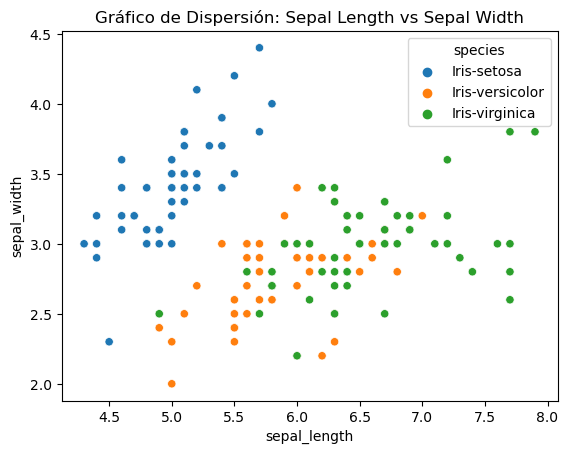

In [7]:
# Gráfico de dispersión para sepal_length y sepal_width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_dataset)
plt.title('Gráfico de Dispersión: Sepal Length vs Sepal Width')
plt.show()

c:\Users\kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


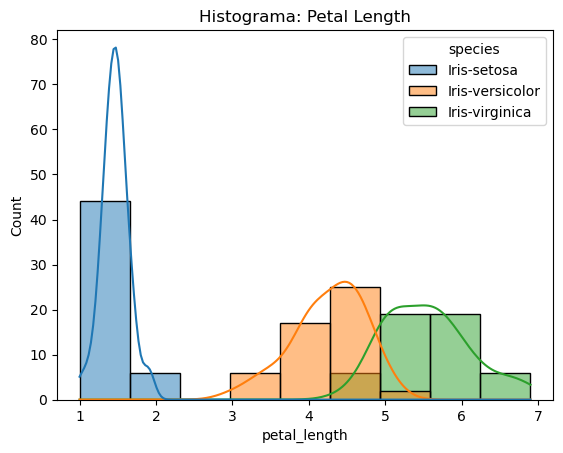

In [8]:
# Histograma para petal_length
sns.histplot(data=iris_dataset, x='petal_length', hue='species', kde=True)
plt.title('Histograma: Petal Length')
plt.show()

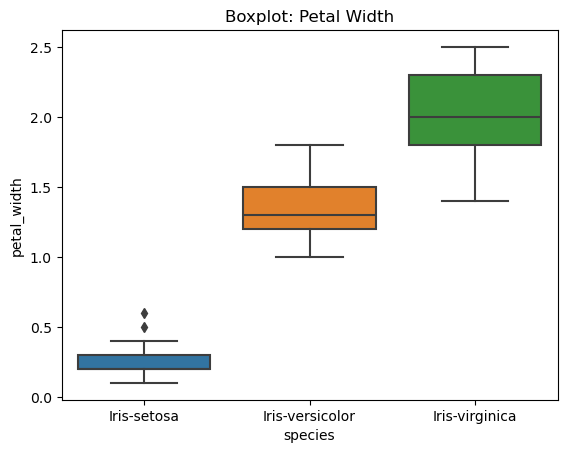

In [9]:
# Boxplot para petal_width
sns.boxplot(x='species', y='petal_width', data=iris_dataset)
plt.title('Boxplot: Petal Width')
plt.show()

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            neighbors = self._get_neighbors(x)
            result = self._get_majority_vote(neighbors)
            predictions.append(result)
        return np.array(predictions)

    def _get_neighbors(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        indices = np.argsort(distances)[:self.k]
        return self.y_train[indices]

    def _get_majority_vote(self, neighbors):
        unique, counts = np.unique(neighbors, return_counts=True)
        return unique[np.argmax(counts)]